In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
df = pd.read_csv("Ecommerce.CSV")


In [4]:
df.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

df.info()


In [6]:
df.describe()

Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462

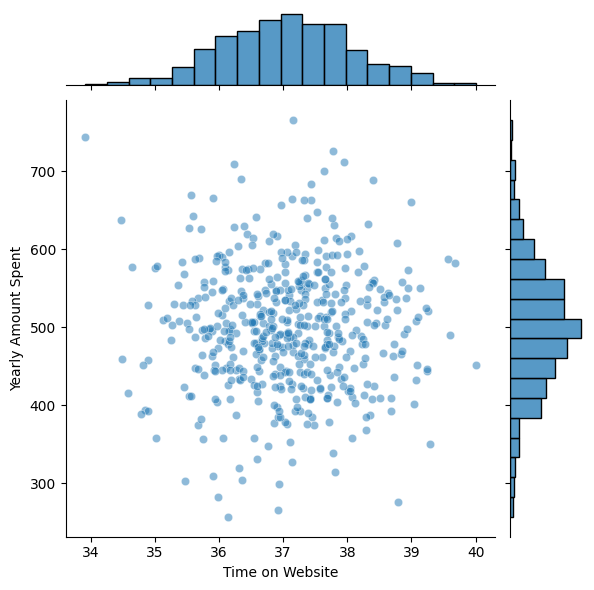

In [7]:
sns.jointplot(x="Time on Website" , y="Yearly Amount Spent" , data=df , alpha=0.5)

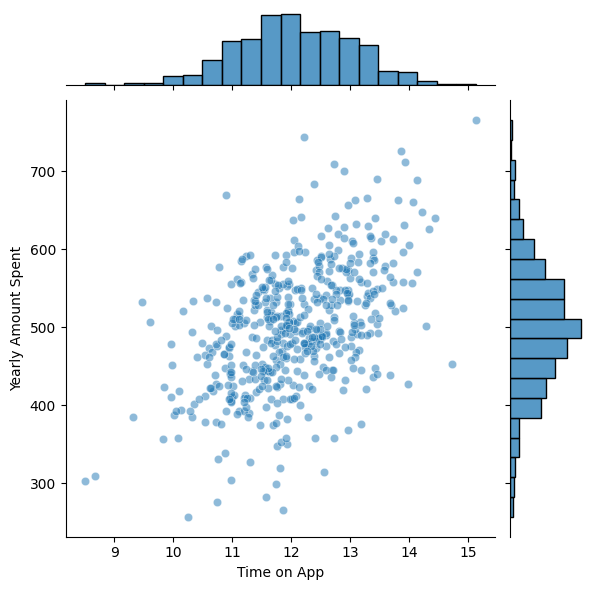

In [8]:
sns.jointplot(x="Time on App" , y="Yearly Amount Spent" , data=df , alpha=0.5)

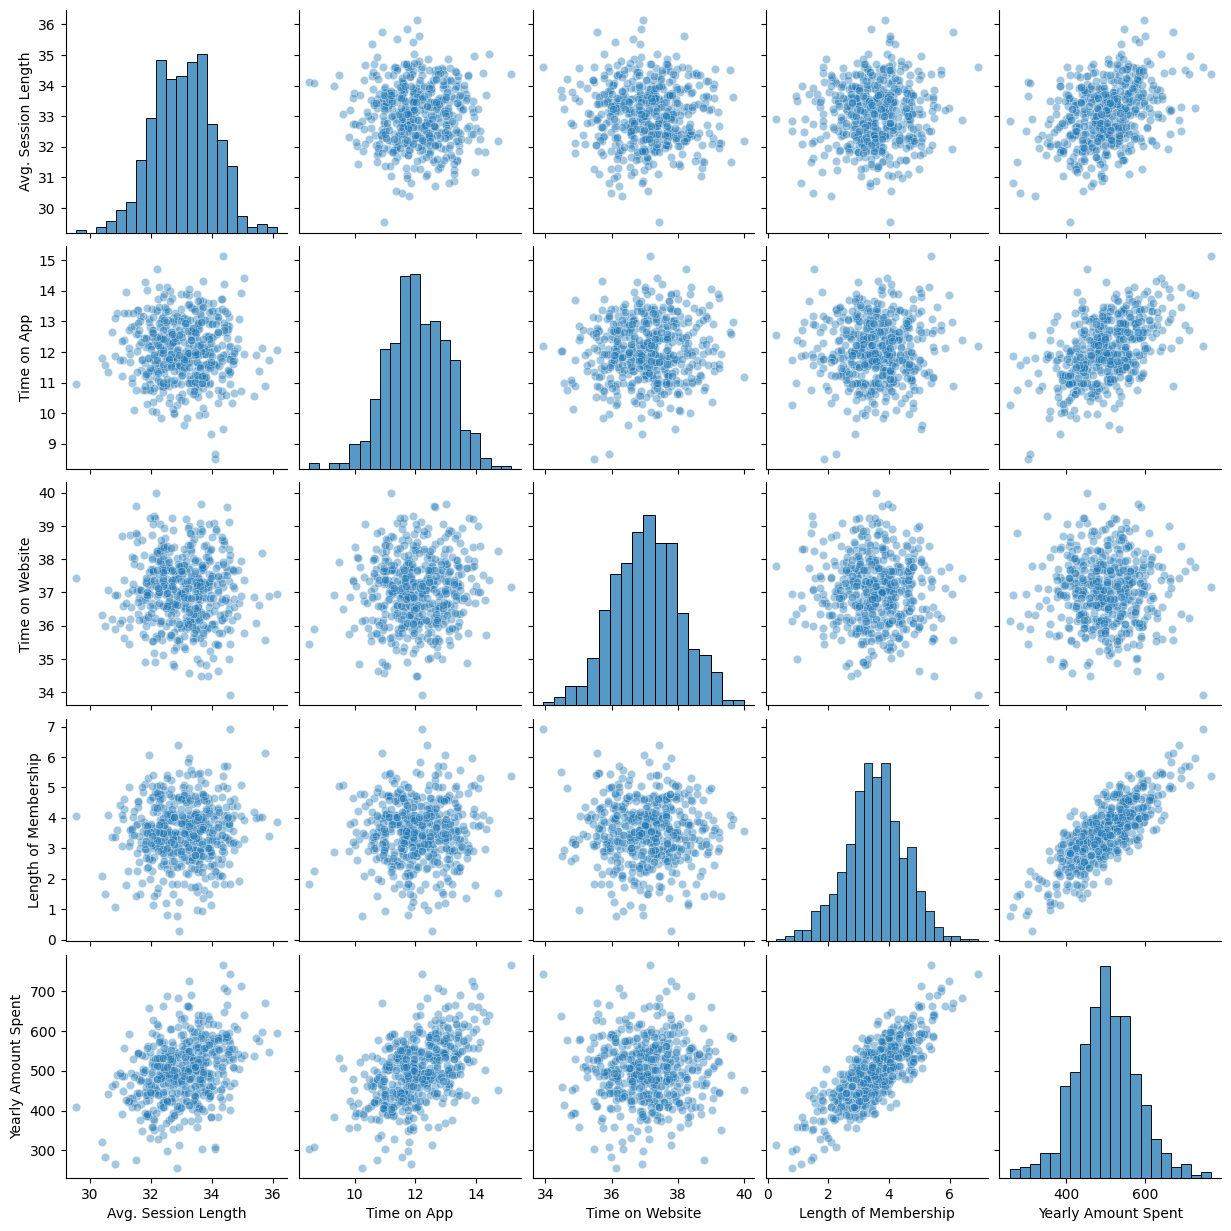

In [9]:
sns.pairplot(df, kind='scatter' , plot_kws={'alpha':0.4})

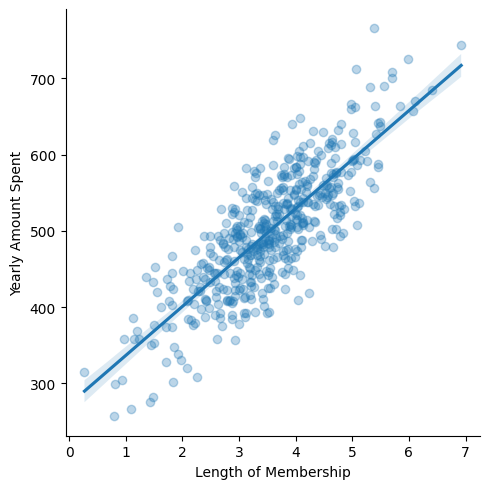

In [10]:
sns.lmplot(x='Length of Membership' , 
           y='Yearly Amount Spent' ,
           data=df,
           scatter_kws={'alpha':0.3})

In [11]:
from sklearn.model_selection import train_test_split


In [12]:
x= df[['Avg. Session Length' , 'Time on App',             
   'Time on Website',         
   'Length of Membership'] ]
y=df['Yearly Amount Spent']
  

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [14]:
x_test


Avg. Session Length  Time on App  Time on Website  Length of Membership
361            32.077590    10.347877        39.045156              3.434560
73             32.808698    12.817113        37.031539              3.851579
374            31.447446    10.101632        38.043453              4.238296
155            32.449522    13.457725        37.238806              2.941411
104            31.389585    10.994224        38.074452              3.428860
..                   ...          ...              ...                   ...
266            34.555283    11.777772        37.979827              3.784273
23             32.903251    11.657576        36.772604              3.919302
222            34.334865    11.109456        38.585855              3.892891
261            32.550527    13.041245        36.655208              3.456234
426            31.425227    13.271475        37.239847              4.022103

[150 rows x 4 columns]

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lm=LinearRegression()

In [18]:
lm.fit(x_train, y_train)

LinearRegression()

In [19]:
lm.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

In [20]:
cdf=pd.DataFrame(lm.coef_, x.columns, columns= ['coef'])

In [21]:
print(cdf)

                           coef
Avg. Session Length   25.724256
Time on App           38.597135
Time on Website        0.459148
Length of Membership  61.674732


In [23]:
predictions= lm.predict(x_test)

In [24]:
predictions

array([403.66993069, 542.57756289, 427.06591658, 502.02460425,
       410.12143559, 569.93442508, 531.93431341, 506.29650969,
       408.71870658, 473.97737105, 441.46912726, 425.33703059,
       425.1297229 , 527.61676714, 431.45684016, 424.0769184 ,
       575.76543296, 484.89856554, 458.35936863, 481.96502182,
       502.32441491, 513.63783554, 507.58877002, 646.57464283,
       450.24372141, 496.27043415, 556.40457807, 554.95630839,
       399.64237199, 325.84623136, 532.89783259, 478.12238702,
       501.05701845, 305.97335848, 505.77244448, 483.79591969,
       518.8331528 , 438.18241857, 456.71094234, 471.04609461,
       494.44008972, 445.31155755, 508.78802753, 501.04594193,
       488.83499673, 535.38079541, 595.20129802, 514.04714872,
       280.76758312, 433.10112367, 421.70823427, 481.23640152,
       584.71372272, 608.7748096 , 563.98513427, 494.72804869,
       394.52133407, 456.4197529 , 573.08767515, 499.6984241 ,
       512.83277025, 392.12434043, 480.05057697, 481.54

Text(0.5, 1.0, 'evaluation of our lm model')

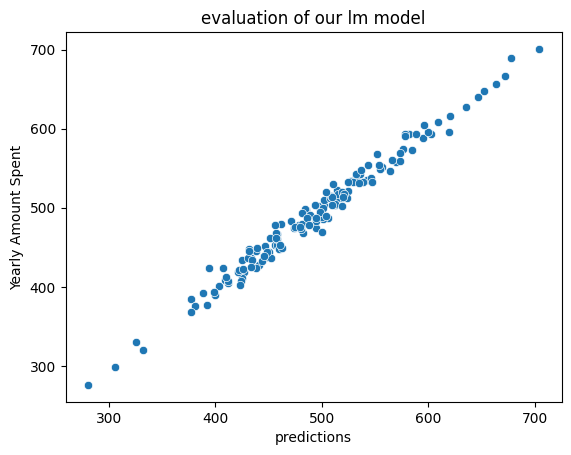

In [25]:
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel('predictions')
plt.title('evaluation of our lm model')

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [27]:
print("mean absolute error:",mean_absolute_error(y_test, predictions))
print("mean squared  error:",mean_squared_error(y_test, predictions))
print("RMSE:", math.sqrt(mean_squared_error(y_test, predictions)))

mean absolute error: 8.426091641432116
mean squared  error: 103.91554136503333
RMSE: 10.193897260863155


In [29]:
residuals=y_test-predictions

In [30]:
sns.displot(residuals, bins= 50, kde=True)

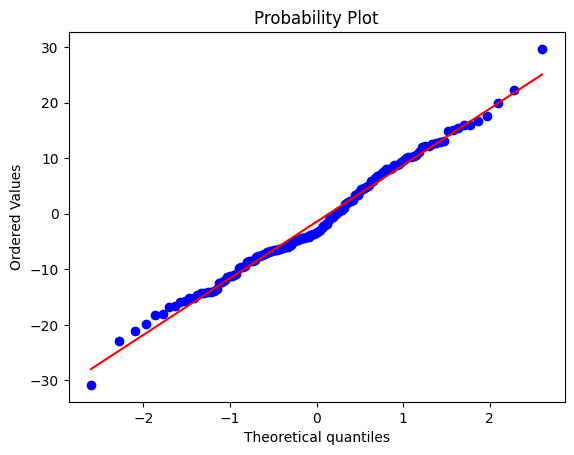

In [31]:
import pylab
import scipy.stats as stats
stats.probplot(residuals, dist='norm', plot=pylab)
pylab.show()